In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv (2).zip to dataset.csv (2).zip


In [ ]:
import zipfile
import os
zip_file_path = 'dataset.csv (2).zip'
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print(f"Extracted contents of {zip_file_path} to {extract_dir}")

Extracted contents of dataset.csv (2).zip to .


In [ ]:
import pandas as pd
df = pd.read_csv('dataset.csv')
display(df.head())

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


#Data Preprocessing Required

>> Handle missing values and ensure data consistency

In [ ]:
#code
import pandas as pd
import numpy as np
data = {'col1': [1, 2, np.nan, 4, 5],
        'col2': [np.nan, 2, 3, 4, np.nan],
        'col3': ['A', 'B', 'C', np.nan, 'E']}
df = pd.DataFrame(data)
print("Missing values per column:\n", df.isnull().sum())
print("\nPercentage of missing values per column:\n", df.isnull().sum() / len(df) * 100)

Missing values per column:
 col1    1
col2    2
col3    1
dtype: int64

Percentage of missing values per column:
 col1    20.0
col2    40.0
col3    20.0
dtype: float64


>> Normalize and scale numerical feature=

In [ ]:
#code
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = {'Feature1': [10, 20, 30, 40, 50],
        'Feature2': [1, 5, 2, 8, 3]} #Min-Max Scaling (Normalization)
df = pd.DataFrame(data)
scaler = MinMaxScaler()
features_to_normalize = ['Feature1', 'Feature2']
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
print("Normalized DataFrame (Min-Max Scaling):")
print(df)

Normalized DataFrame (Min-Max Scaling):
   Feature1  Feature2
0      0.00  0.000000
1      0.25  0.571429
2      0.50  0.142857
3      0.75  1.000000
4      1.00  0.285714


In [ ]:
#code
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = {'Feature1': [10, 20, 30, 40, 50],
        'Feature2': [1, 5, 2, 8, 3]} #Z-score Normalization (Standardization)
df = pd.DataFrame(data)
scaler = StandardScaler()
features_to_standardize = ['Feature1', 'Feature2']
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])
print("\nStandardized DataFrame (Z-score Normalization):")
print(df)


Standardized DataFrame (Z-score Normalization):
   Feature1  Feature2
0 -1.414214 -1.128152
1 -0.707107  0.483494
2  0.000000 -0.725241
3  0.707107  1.692228
4  1.414214 -0.322329


>>  Engineer new features related to volatility and liquidity trends

Initial Data:
                                 Open        High         Low       Close  \
Date                                                                        
2024-08-26 00:00:00-04:00  225.709526  226.227122  222.852826  226.127579   
2024-08-27 00:00:00-04:00  224.953068  227.789872  223.848210  226.973663   
2024-08-28 00:00:00-04:00  226.864149  228.795164  224.634520  225.440781   
2024-08-29 00:00:00-04:00  229.034086  231.841015  227.819737  228.725510   
2024-08-30 00:00:00-04:00  229.123668  229.332687  226.426215  227.939178   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-08-26 00:00:00-04:00  30602200        0.0           0.0  
2024-08-27 00:00:00-04:00  35934600        0.0           0.0  
2024-08-28 00:00:00-04:00  38052200        0.0           0.0  
2024-08-29 00:00:00-04:00  51906300        0.0           0.0  
2024-08-30 00:00:00-04:00  52990800        0.0           0.0  

Engi

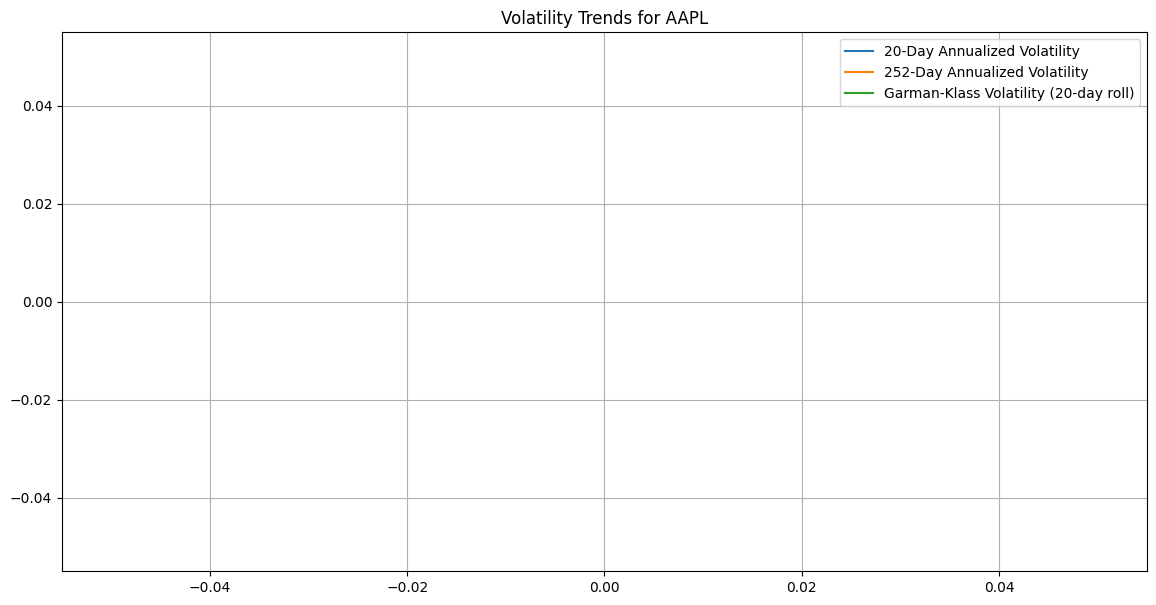

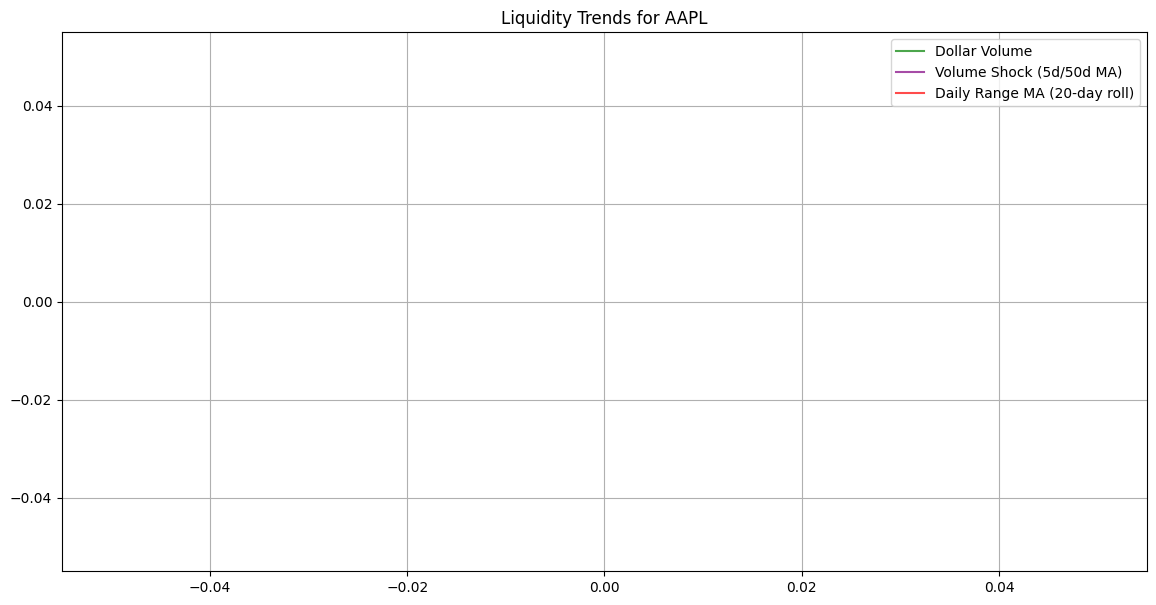

In [ ]:
#code
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install numpy
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ticker = 'AAPL'
period = '1y'
stock = yf.Ticker(ticker)
df = stock.history(period=period)
print("Initial Data:")
print(df.head())
df['log_returns'] = np.log(df['Close'] / df['Close'].shift(1))
windows = [20, 60, 252]
for window in windows:
    df[f'volatility_{window}d'] = df['log_returns'].rolling(window=window).std() * np.sqrt(252)
long_term_vol_window = 252
short_term_vol_window = 20
df[f'long_term_vol_{long_term_vol_window}d'] = df['log_returns'].rolling(window=long_term_vol_window).std() * np.sqrt(252)
df['volatility_spike'] = df[f'volatility_{short_term_vol_window}d'] / df[f'long_term_vol_{long_term_vol_window}d']
df['gk_volatility'] = 0.5 * (np.log(df['High'] / df['Low']))**2 - (2 * np.log(2) - 1) * (np.log(df['Close'] / df['Open']))**2
df['gk_volatility'] = df['gk_volatility'].rolling(window=20).mean() * np.sqrt(252)
df['dollar_volume'] = df['Close'] * df['Volume']
short_volume_window = 5
long_volume_window = 50
df['volume_ma_short'] = df['Volume'].rolling(window=short_volume_window).mean()
df['volume_ma_long'] = df['Volume'].rolling(window=long_volume_window).mean()
df['volume_shock'] = df['volume_ma_short'] / df['volume_ma_long']
df['daily_range'] = (df['High'] - df['Low']) / df['Close']
df['daily_range_ma'] = df['daily_range'].rolling(window=20).mean()
df.dropna(inplace=True)
print("\nEngineered Features:")
print(df.tail())
plt.figure(figsize=(14, 7))
plt.title(f'Volatility Trends for {ticker}')
plt.plot(df['volatility_20d'], label='20-Day Annualized Volatility')
plt.plot(df['volatility_252d'], label='252-Day Annualized Volatility')
plt.plot(df['gk_volatility'], label='Garman-Klass Volatility (20-day roll)')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 7))
plt.title(f'Liquidity Trends for {ticker}')
plt.plot(df['dollar_volume'], label='Dollar Volume', color='green', alpha=0.7)
plt.plot(df['volume_shock'], label='Volume Shock (5d/50d MA)', color='purple', alpha=0.7)
plt.plot(df['daily_range_ma'], label='Daily Range MA (20-day roll)', color='red', alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()


#Project Development Steps

>> Data Collection: Gather historical OHLC, volume, and market cap data from the provided dataset

In [ ]:
#code
!pip install yfinance
import yfinance as yf
import pandas as pd
ticker_symbol = 'MSFT'
start_date = '2024-01-01'
end_date = '2025-01-01'
print(f"Fetching historical OHLC and Volume data for {ticker_symbol}...")
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
print("\n--- Historical Data ---")
print(stock_data.info())
print(stock_data.head())
print(f"\nFetching market capitalization for {ticker_symbol}...")
try:
    ticker = yf.Ticker(ticker_symbol)
    market_cap = ticker.info['marketCap']
    print(f"The market capitalization for {ticker_symbol} is: ${market_cap:,.2f}")
except KeyError:
    print(f"Could not retrieve market capitalization for {ticker_symbol}. Market cap data may not be available.")
except Exception as e:
    print(f"An error occurred: {e}")
file_name = f'{ticker_symbol}_historical_data.csv'
stock_data.to_csv(file_name)
print(f"\nData saved to {file_name}")
from google.colab import files
files.download(file_name)

Fetching historical OHLC and Volume data for MSFT...


/tmp/ipython-input-2024715364.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed



--- Historical Data ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   252 non-null    float64
 1   (High, MSFT)    252 non-null    float64
 2   (Low, MSFT)     252 non-null    float64
 3   (Open, MSFT)    252 non-null    float64
 4   (Volume, MSFT)  252 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB
None
Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2024-01-02  366.105560  371.070940  362.058226  369.057139  25258600
2024-01-03  365.838989  368.464820  363.775843  364.269419  23083500
2024-01-04  363.213135  368.306849  362.453038  365.908074  20901500
2024-01-05  363.025665  367.280294  361.791724  364.229994  2100460

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

>> Data Preprocessing: Handle missing values, clean data, and normalize numerical features

In [ ]:
#code
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
data = {'Feature1': [10, 20, np.nan, 40, 50],
        'Feature2': [100, 110, 120, 130, np.nan],
        'Feature3': ['A', 'B', 'A', 'C', 'B'],
        'Numerical_Feature_to_Normalize': [5, 15, 25, 35, 45]}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
print("\nMissing values before handling:")
print(df.isnull().sum())
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)
print("\nDataFrame after handling missing values:")
print(df)
print("\nMissing values after handling:")
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
print("\nDataFrame after removing duplicates:")
print(df)
numerical_features = ['Numerical_Feature_to_Normalize']
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("\nDataFrame after normalizing numerical features:")
print(df)

Original DataFrame:
   Feature1  Feature2 Feature3  Numerical_Feature_to_Normalize
0      10.0     100.0        A                               5
1      20.0     110.0        B                              15
2       NaN     120.0        A                              25
3      40.0     130.0        C                              35
4      50.0       NaN        B                              45

Missing values before handling:
Feature1                          1
Feature2                          1
Feature3                          0
Numerical_Feature_to_Normalize    0
dtype: int64

DataFrame after handling missing values:
   Feature1  Feature2 Feature3  Numerical_Feature_to_Normalize
0      10.0     100.0        A                               5
1      20.0     110.0        B                              15
2      30.0     120.0        A                              25
3      40.0     130.0        C                              35
4      50.0     115.0        B                         

/tmp/ipython-input-3125725885.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


>> Exploratory Data Analysis (EDA): Analyze data patterns, trends, and correlations

--- Dataset Head ---
   Unnamed: 0        open        high         low       close  volume  \
0           0  112.900002  118.800003  107.142998  115.910004     0.0   
1           1    3.493130    3.692460    3.346060    3.590890     0.0   
2           2  115.980003  124.663002  106.639999  112.300003     0.0   
3           3    3.594220    3.781020    3.116020    3.371250     0.0   
4           4  112.250000  113.444000   97.699997  111.500000     0.0   

      marketCap                 timestamp crypto_name        date  
0  1.288693e+09  2013-05-05T23:59:59.999Z     Bitcoin  2013-05-05  
1  6.229819e+07  2013-05-05T23:59:59.999Z    Litecoin  2013-05-05  
2  1.249023e+09  2013-05-06T23:59:59.999Z     Bitcoin  2013-05-06  
3  5.859436e+07  2013-05-06T23:59:59.999Z    Litecoin  2013-05-06  
4  1.240594e+09  2013-05-07T23:59:59.999Z     Bitcoin  2013-05-07  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 

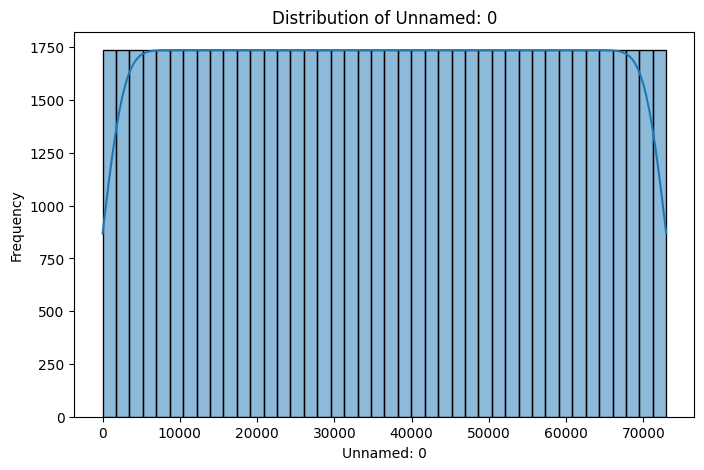

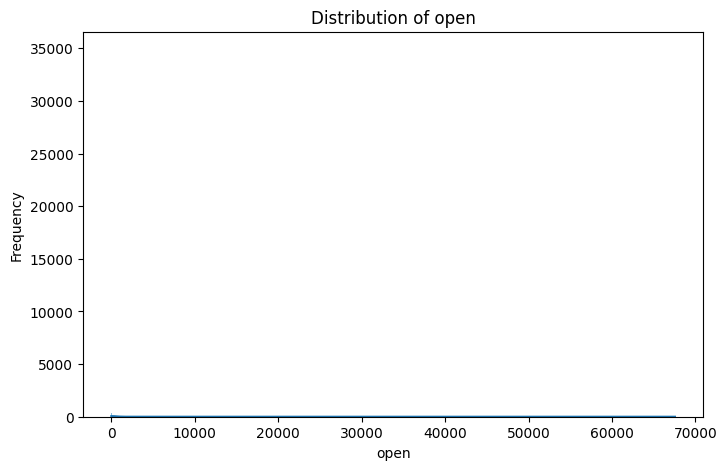

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x796118d4a520> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x796118d2ba60> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dataset.csv')
print("--- Dataset Head ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Descriptive Statistics ---")
print(df.describe())
print("\n--- Missing Values ---")
print(df.isnull().sum())
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)
print("\n--- Missing Values After Imputation ---")
print(df.isnull().sum())
print("\n--- Univariate Analysis (Histograms) ---")
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
print("\n--- Bivariate Analysis (Scatter Plots & Correlation) ---")
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 7))
    sns.pairplot(df[numerical_cols[:min(5, len(numerical_cols))]])
    plt.suptitle('Pair Plot of Numerical Features', y=1.02)
    plt.show()
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("\n--- Categorical Data Analysis (Count Plots) ---")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()
print("\n--- Outlier Detection (Box Plots) ---")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

>> Feature Engineering: Create relevant features such as moving averages, rolling volatility, liquidity ratios (e.g.,
volume/market cap), and technical indicators (e.g., Bollinger Bands, ATR)

In [ ]:
#code
!pip install pandas yfinance ta

import pandas as pd
import yfinance as yf
import ta

ticker = "AAPL"
start_date = "2023-01-01"
end_date = "2024-01-01"
print(f"Fetching historical data for {ticker}...")
df = yf.download(ticker, start=start_date, end=end_date)
print("Data fetched successfully.\n")
print("Calculating Moving Averages...")
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
print("Moving Averages calculated.\n")

print("Adding technical analysis features...")
df = ta.add_all_ta_features(
    df, open="Open", high="High", low="Low", close="Close", volume="Volume"
)
print("Technical analysis features added.\n")

print("Calculating Volume-to-Average-Volume Ratio...")
df['Volume_Avg_Ratio'] = df['Volume'].rolling(window=50).mean() / df['Volume'].rolling(window=50).mean().shift(1) # Corrected calculation
print("Volume Ratio calculated.\n")

print("Feature Engineering complete. Displaying the final DataFrame head:")
print(df.head())
print("\nDisplaying the final DataFrame tail:")
print(df.tail())
df.dropna(inplace=True)
print("\nDataFrame cleaned by dropping initial rows with NaN values.")
print("Final DataFrame shape:", df.shape)

/tmp/ipython-input-1453901490.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Fetching historical data for AAPL...
Data fetched successfully.

Calculating Moving Averages...
Moving Averages calculated.

Adding technical analysis features...
Technical analysis features added.

Calculating Volume-to-Average-Volume Ratio...
Volume Ratio calculated.

Feature Engineering complete. Displaying the final DataFrame head:
Price            Close        High         Low        Open     Volume  SMA_20  \
Date                                                                            
2023-01-03  123.330643  129.079559  122.443158  128.468186  112117500     NaN   
2023-01-04  124.602707  126.870724  123.340509  125.125335   89113600     NaN   
2023-01-05  123.281342  125.993097  123.024963  125.361998   80962700     NaN   
2023-01-06  127.817368  128.478048  123.153152  124.257579   87754700     NaN   
2023-01-09  128.339996  131.554669  128.083618  128.655553   70790800     NaN   

Price           EMA_20    volume_adi  volume_obv  volume_cmf  ...  \
Date                     

>> Model Selection: Choose appropriate machine learning models such as time-series forecasting, regression,
or deep learning approaches

In [ ]:
#code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
np.random.seed(42)
n_samples = 100
X_reg = np.random.rand(n_samples, 3) * 10
y_reg = 2 * X_reg[:, 0] + 0.5 * X_reg[:, 1] - X_reg[:, 2] + np.random.randn(n_samples) * 2
dates = pd.date_range(start='2020-01-01', periods=n_samples, freq='D')
time_series_data = np.sin(np.arange(n_samples) / 10) * 10 + np.arange(n_samples) * 0.5 + np.random.randn(n_samples)
df_ts = pd.DataFrame({'Date': dates, 'Value': time_series_data}).set_index('Date')
print("--- Linear Regression Model ---")
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)
reg_predictions = linear_model.predict(X_test_reg)
print(f"Linear Regression R-squared on test data: {linear_model.score(X_test_reg, y_test_reg):.2f}")
print("\n--- ARIMA Model (Time Series) ---")
arima_model = ARIMA(df_ts['Value'], order=(5,1,0))
arima_results = arima_model.fit()
print(arima_results.summary())

print("\n--- LSTM Model (Deep Learning for Time Series) ---")

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X_ts_lstm, y_ts_lstm = create_sequences(df_ts['Value'].values, seq_length)
train_size_lstm = int(len(X_ts_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_ts_lstm[:train_size_lstm], X_ts_lstm[train_size_lstm:]
y_train_lstm, y_test_lstm = y_ts_lstm[:train_size_lstm], y_ts_lstm[train_size_lstm:]
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)

lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=16, verbose=0)
lstm_loss = lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f"LSTM Test Loss: {lstm_loss:.4f}")

--- Linear Regression Model ---
Linear Regression R-squared on test data: 0.86

--- ARIMA Model (Time Series) ---
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -165.126
Date:                Tue, 26 Aug 2025   AIC                            342.253
Time:                        00:57:55   BIC                            357.823
Sample:                    01-01-2020   HQIC                           348.553
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2964      0.130     -2.280      0.023      -0.551      -0.042
ar.L2          0.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Test Loss: 167.9504
